# 911 Calls Capstone Project

In this notebook, I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The first part consists of basic data exploration, later I proceed with preparation of the dataset for further analysis, which is conducted further. Finally, there are some data visualizations revealing interesting insights from the dataset.

## Data and Setup

Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Reading the dataset in the form of .csv file as a df instance

In [2]:
df = pd.read_csv("911.csv")

Checking basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Checking the structure of the dataset

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


## Basic Questions

Checking 5 most frequently repeating zip codes. It could provide the police with information regarding which areas have the biggest crime rate

In [4]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Doing the same for top 5 townships

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Checking how many titles of 911 calls are there.

In [6]:
df['title'].nunique()

110

## Creating new features

Since there were a lot of unique calls titles, it would be reasonable to group them somehow to facilitate the further data exploration. Looking at one of the cells above which uses function .head(), we can see that there are 3 types of calls: EMS, Fire, and Traffic. Let's try to divide the data entries by titles into these 3 groups. To do it, I will apply a lambda expression that creates a new column with the name of the reason behind the call, and splits the original value from the column 'title' (what's worth noting here from the .head() cell is that all the titles start with the name of the reason followed by ':'. We will use this pattern.) Let this column be called 'Reason'.

In [7]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

Now, let's look at the dataframe again. We will see that the lambda expression worked as expected and all the entries have their 'reason' in the respective column

In [9]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Now, let's examine how many entries does each reason have

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Now, let's visualize this data in the form of histogram with the use of seaborn.

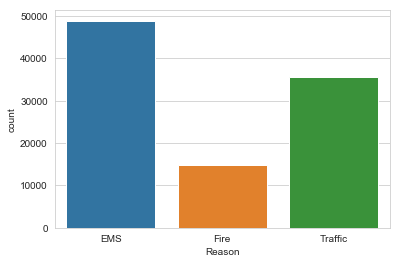

In [11]:
sns.countplot(x='Reason', data=df)

One of the ways in which we could obtain some interesting information from this dataset is by examining the times at which the calls are made. First, let's check what format does the data in the 'timeStamp' column have

In [12]:
type(df['timeStamp'].iloc[0])

str

As we can see, the data type is strings, which makes it impossible (or at least very tedious) to analyze it in this form. Let's change the datatype to DateTime objects. We will use pd.to_datetime function here.

In [13]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df["timeStamp"].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

To further facilitate the data analysis,  we will divide timestamps into hours, months and days of the week. We will do it by creating 3 new columns and assigning them respective data. By converting the data type into datetime, it is easy to perform the desired operation with e.g. .dt.hour.

In [15]:
df['hour'] = df['timeStamp'].dt.hour
df['month'] = df['timeStamp'].dt.month
df['dayofweek'] = df['timeStamp'].dt.dayofweek
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


As we can see, day of the week is presented in the form of number from 0 to 6. To make it easier for us to understand the data, let's convert these numbers into actual names of the days. To do it, we will use .map() function. Here, we are working with a dictionary.

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)

Now, let's see how many calls are made each day of the week. It owuld be interestinf to see what types of reasons are responsible for these calls. We will use seaborn and expression 'hue', which marks aspects of interest with different colors (here reasons).

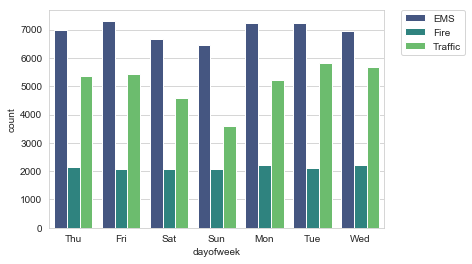

In [17]:
sns.countplot(x='dayofweek', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now let's do the same operation for month

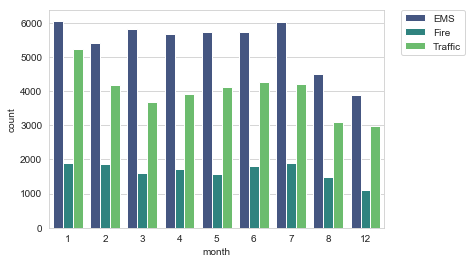

In [18]:
sns.countplot(x='month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

When we look closely to the graph, we can see that some months are missing. Let's try to plot the same information in another way. Let's try a simple line plot. To do so, we will have to fill in the missing months. For that purpose, we will use pandas package.

We will create a groupby object that will store the data from our dataset grouped by the month column. We will use count() method to aggregate the number of calls

In [25]:
byMonth = df.groupby(df['month']).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Now, we will plot the information from the byMonth dataframe. We will look at the number of calls (y-axis) per month (x-axis)

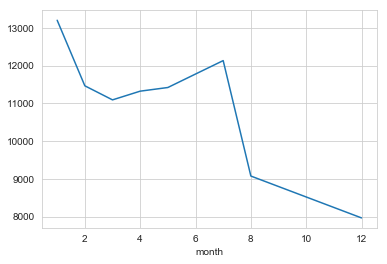

In [22]:
byMonth['twp'].plot()

How this operation solves the problem is basically 'filling' the data with the link between two data points existing in the dataframe (for month 8 and 12). Even though this option does not provide us with the exact answer regarding the number of calls in the missing months, it gives a sense of how the data is likely to look like and can be of use for a preliminary data exploration.

Now, let's try to create a linear fit on the number of calls per month. To do so, we will use seaborn's lmplot() function. We have to keep in mind, however, that the current datastructure would not allow us this operation. When we look at the byMonth.head(), we can see that month is not a column, but an index. To change it into an index, we will use .reset_index() method. First, we will apply this method to see the change of the structure of the dataframe and then proceed with constructing a linear fit plot.

In [26]:
byMonth.reset_index()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


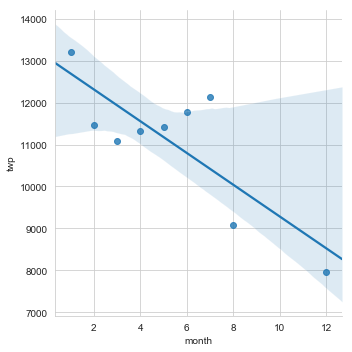

In [28]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

This plot shows us that there is a trend of number of calls falling down throughout the year. As we could see, however, from the linear plot, the data does not look linear - it resembles more a polynomial graph of x^3, indicating that the linear fit model might not be the most accurate statistical learning device to use (also symbolized by the wide shaded area on the right hand side of the graph)

Now, we will try to look for patterns in calls by date. To do so, we start with creating a column 'Date'. We will apply .dt.date() method to obtain the entries by date.

In [30]:
df['Date'] = df['timeStamp'].dt.date

Now, let's sum up the number of entries per date by using .groupby and .count(). Additionally, let's create a plot showing number of calls per date. To make the data more visible, we will increase the size of the figure a bit by figsize=(10,5) method.

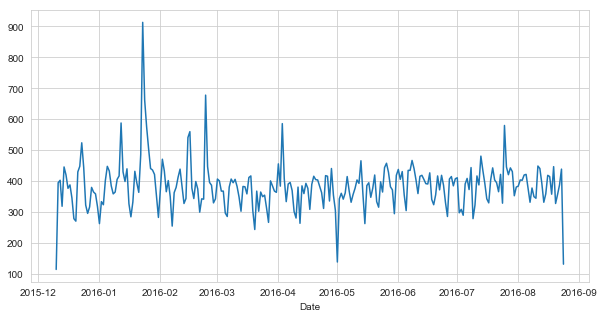

In [43]:
byDate = df.groupby(df['Date']).count()
byDate['twp'].plot(figsize=(10,5))

Now, we will try to observe any potential differences in frequency of calls due to particular reasons. We will do it by creating the 3 graphs, the same as above but each one for a different reason. To do so, we will call the data entries from our dataframe where 'Reason'=our reason of interest and just as in the previous example, group it by 'Date' and sum up with .count()

Text(0.5, 1.0, 'Traffic')

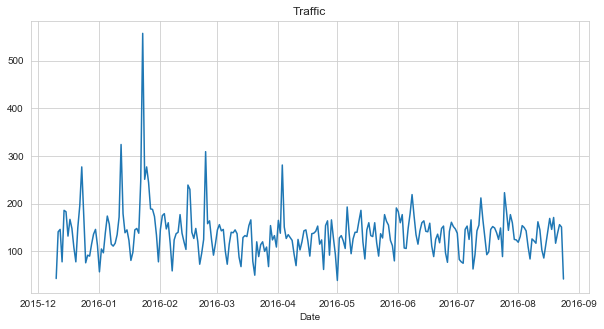

In [40]:
df[df['Reason']=='Traffic'].groupby(df['Date'])['twp'].count().plot(figsize=(10,5))
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

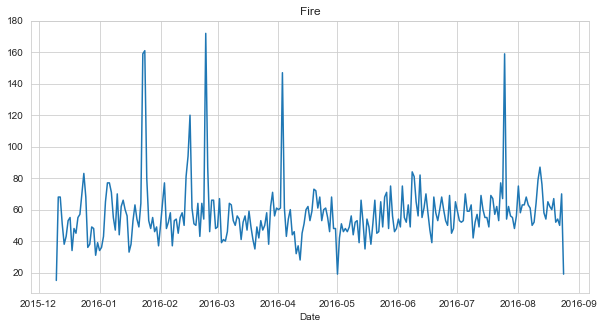

In [41]:
df[df['Reason']=='Fire'].groupby(df['Date'])['twp'].count().plot(figsize=(10,5))
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

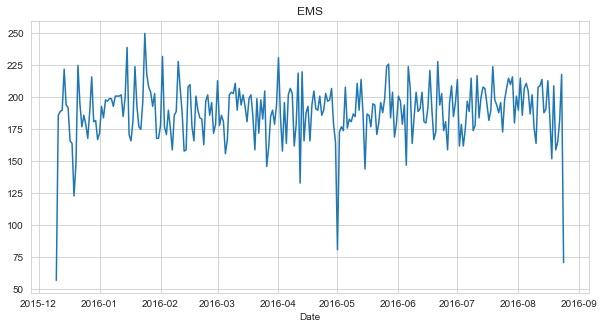

In [42]:
df[df['Reason']=='EMS'].groupby(df['Date'])['twp'].count().plot(figsize=(10,5))
plt.title('EMS')

As we can see, the graphs have very rapid spikes and plummets at some dates. This infomration could give the police an incentive to look closer into data in search of causes of these phenomena, which could lead to prevention of causes of calls in the most heightened periods.